<a href="https://colab.research.google.com/github/hhchin1995/water-quality-clustering/blob/main/Coastal_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coastal water clustering and decision tree for classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Water Samples.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[:, 1:].values

y_train=dataset.iloc[:, 0].values

X_test=np.array([[8.0,112, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9],
                 [7.0,112, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9],
                 [6.0,1000, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9]])
print(X_test.shape)


## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# sc.fit(X_c)
# X_c=sc.transform(X_c)
X_c=sc.fit_transform(X_c)

X_test_sc=sc.transform(X_test)

print(X_c)
print(X_test_sc)

Custom Sampling (clean data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_c_scaled = X_c


# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_c_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3','label_4']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_c_filtered=np.zeros(X_c.shape)
y_train_filtered=np.zeros(X_c.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_c_filtered[ii,:] = X_c[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_c_filtered=x_c_filtered[np.all(x_c_filtered != 0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_c, y_train = sm.fit_resample(x_c_filtered, y_train_filtered)

print(X_c)

Clustering

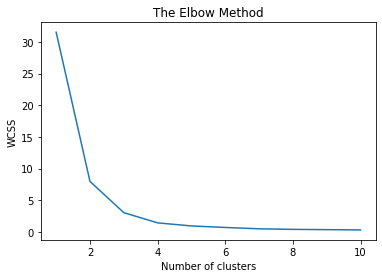

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 14)
# X_c= pca.fit_transform(X_c)
# print(pca.explained_variance_ratio_)
# print(sum(pca.explained_variance_ratio_))

# # loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],
# # #                                                    'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12',
# # #                                                    'PC13', 'PC14'],
# #                          index=dataset.columns[2:])
# # print(loadings)

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_c = kpca.fit_transform(X_c)

X_test_kpca=kpca.transform(X_test_sc)

kpca_transform = kpca.fit_transform(X_c)
explained_variance = np.var(kpca_transform, axis=0)
ev = explained_variance / np.sum(explained_variance)
print(ev)
print(sum(ev))

print(X_test_kpca)



In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
# plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of plastic waste')
# plt.xlabel('Metal concentration (ppm)')
# plt.ylabel('MFI ')
# plt.legend()
# plt.show()
print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

(115, 2)
0.7230823830245359
0.37851214355421026
525.2000763041012


In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)



# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.7283267905750318
0.3724414958935633
581.3760179908381


In [ ]:
# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_c, y_hc)

y_test=knn.predict(X_test_kpca)
preds = pd.DataFrame(knn.predict_proba(X_test_kpca))

print(y_test)


preds.columns = ['label_0', 'label_1','label_2']

print(preds)

In [ ]:
# Visualising the clusters
plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**DBSCAN**

In [ ]:
i=np.identity(dataset.shape[1]-2)
print(pca.transform(i))

[[ 0.24047763  0.12585364]
 [ 0.1915152   0.38887186]
 [ 0.25987549 -0.02594473]
 [ 0.22735792  0.30938942]
 [ 0.29270299  0.12400405]
 [ 0.27455235 -0.11356291]
 [ 0.18191918 -0.04044776]
 [ 0.09498813 -0.05360648]
 [ 0.25988127 -0.04787519]
 [ 0.26716293 -0.03215638]
 [ 0.20028072  0.36740759]
 [ 0.21979492  0.33937065]
 [ 0.19512607 -0.28386288]
 [ 0.15585633  0.27225593]
 [ 0.16509275 -0.11903487]
 [-0.21263366  0.16336045]
 [ 0.09070376 -0.19443126]
 [ 0.19044967 -0.0882263 ]
 [ 0.21966761 -0.14127231]
 [ 0.24482695 -0.31879575]
 [ 0.26121121 -0.29587361]]


In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=4, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-400, random_state=10,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)